In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
import seaborn as sns

/home/fredlinux/.pyenv/versions/3.7.9/lib/python3.7/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
from util import RESOURCE_DIR
type_characterization = ['database.xlsx', 'implementation.xlsx', 'implementation_names.xlsx', 'query.xlsx', 'count_implementation_rate.xlsx', 'count_sql.xlsx']
CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[1]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
len(df)
df.head()

,Projects,Domains,mybatis,jOOQ,Spring,JPA,JDBC,Hibernate,EclipseLink
0,Activiti,automation,1,0,1,1,0,1,0
1,skywalking,monitoring,0,0,0,1,0,1,0
2,storm,hpc,1,1,1,0,0,0,0
3,che,software development,0,0,0,0,0,0,0
4,pinpoint,monitoring,1,0,1,0,0,0,0


In [4]:
data_with_index = df.set_index("Projects")
#data_with_index = data_with_index.drop(["ethereumj", "openhab1-addons", "openhab2-addons", "Silence", "docker-client", "riot-android", "zalenium"])
data_with_index = data_with_index.drop(columns='JPA')
data_with_index.head()

,Domains,mybatis,jOOQ,Spring,JDBC,Hibernate,EclipseLink
Projects,,,,,,,
Activiti,automation,1,0,1,0,1,0
skywalking,monitoring,0,0,0,0,1,0
storm,hpc,1,1,1,0,0,0
che,software development,0,0,0,0,0,0
pinpoint,monitoring,1,0,1,0,0,0


In [5]:
data_jpa = df[["Projects", "Domains", "JPA"]].copy()
data_jpa.iloc[: , 2:].sum().sort_values(ascending=False)

JPA    67
dtype: int64

In [6]:
data_with_index.iloc[: , 1:].sum().sort_values(ascending=False)

mybatis        155
Hibernate       94
Spring          45
EclipseLink     14
jOOQ             7
JDBC             0
dtype: int64

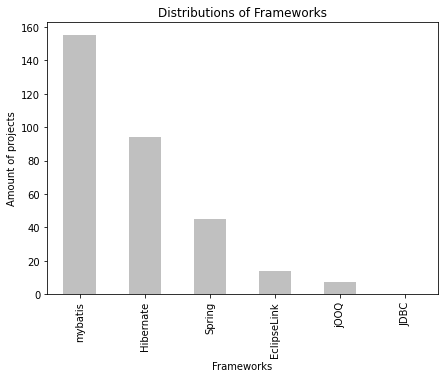

In [7]:
plt.figure(figsize=(7,5))
data_with_index.iloc[: , 1:].sum().sort_values(ascending=False).plot(kind='bar', title="Distributions of Frameworks", color='silver')
plt.xlabel("Frameworks")
plt.ylabel("Amount of projects")
plt.show() 

In [8]:
from util import USAGE_FAN_IN_FILE
df = pd.read_excel(USAGE_FAN_IN_FILE, engine = 'openpyxl')
df.head()
#data_with_index = df.set_index("Projects")
#data_with_index = data_with_index.drop(["ethereumj", "openhab1-addons", "openhab2-addons", "Silence", "docker-client", "riot-android", "zalenium"])
#data_with_index.reset_index(inplace=True)

,Projects,DB-Code(Java),DB-Code(XML),Dependencies,Total-DB,Total-Project,Rate
0,Activiti,13,62,14,89,4899,1.816697
1,che,48,25,53,126,2538,4.964539
2,pinpoint,1,3,0,4,8149,0.049086
3,skywalking,0,3,0,3,2587,0.115964
4,wildfly,202,1,335,538,14079,3.821294


In [9]:
data_with_index = df.iloc[: , :].sort_values(by='Total-DB', ascending=False)
data_with_index.head()

,Projects,DB-Code(Java),DB-Code(XML),Dependencies,Total-DB,Total-Project,Rate
4,wildfly,202,1,335,538,14079,3.821294
1,che,48,25,53,126,2538,4.964539
0,Activiti,13,62,14,89,4899,1.816697
2,pinpoint,1,3,0,4,8149,0.049086
5,storm,3,1,0,4,3398,0.117716


<AxesSubplot:>

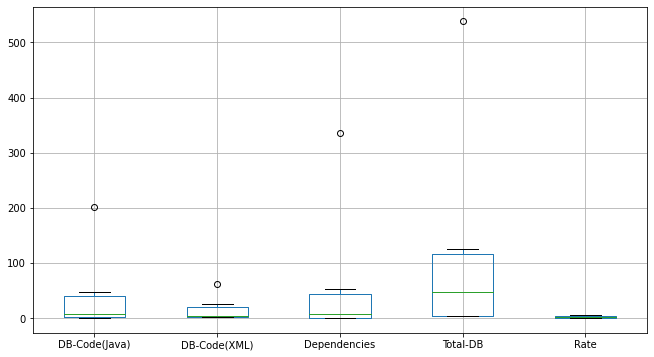

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize =(11, 6))
df.boxplot(column=['DB-Code(Java)', 'DB-Code(XML)', 'Dependencies', 'Total-DB', 'Rate'])

In [11]:
from apyori import apriori

rules = apriori(data_with_index, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2)

results = list(rules)
results = pd.DataFrame(results)
results.head(5)

,items,support,ordered_statistics
0,"((, ))",0.285714,"[(((), ()), 1.0, 3.5), (()), ((), 1.0, 3.5)]"
1,"(C, ()",0.285714,"[(((), (C), 1.0, 3.5), ((C), ((), 1.0, 3.5)]"
2,"(J, ()",0.142857,"[(((), (J), 0.5, 3.5), ((J), ((), 1.0, 3.5)]"
3,"(L, ()",0.142857,"[(((), (L), 0.5, 3.5), ((L), ((), 1.0, 3.5)]"
4,"(M, ()",0.142857,"[(((), (M), 0.5, 3.5), ((M), ((), 1.0, 3.5)]"


In [12]:
from mlxtend.frequent_patterns import apriori, association_rules

CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[1]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
df = df.iloc[: , 2:]

frq_items = apriori(df, min_support = 0.01, use_colnames = True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values('lift', ascending =False)
rules = rules[rules['consequents'].apply(lambda x: len(x)) == 1]
rules[rules['antecedents'] == {'JPA'}]


/home/fredlinux/.pyenv/versions/3.7.9/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:115: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
18,(JPA),(EclipseLink),0.208075,0.043478,0.034161,0.164179,3.776119,0.025115,1.144410
11,(JPA),(Spring),0.208075,0.139752,0.065217,0.313433,2.242786,0.036139,1.252971
17,(JPA),(Hibernate),0.208075,0.291925,0.121118,0.582090,1.993966,0.060376,1.694321
2,(JPA),(mybatis),0.208075,0.481366,0.158385,0.761194,1.581319,0.058225,2.171778


In [13]:
USAGE_FAN_IN_FILE_PATH = RESOURCE_DIR + os.sep + "usage_fan_in_file.xlsx"
df_usage_fan_in = pd.read_excel(USAGE_FAN_IN_FILE_PATH, engine = 'openpyxl')

CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[2]
implementation = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')

implementation_usage = pd.merge(implementation, df_usage_fan_in, how = 'inner', on = 'Projects')
implementation_usage = implementation_usage.drop(columns=['Domains', 'DB-Code(Java)', 'DB-Code(XML)', 'Dependencies', 'Total-DB', 'Total-Project' ])
implementation_usage.head()

,Projects,mybatis,jOOQ,Spring,JPA,JDBC,Hibernate,EclipseLink,Rate
0,Activiti,mybatis,NaN,Spring,JPA,NaN,Hibernate,NaN,1.816697
1,skywalking,NaN,NaN,NaN,JPA,NaN,Hibernate,NaN,0.115964
2,storm,mybatis,jOOQ,Spring,NaN,NaN,NaN,NaN,0.117716
3,che,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.964539
4,pinpoint,mybatis,NaN,Spring,NaN,NaN,NaN,NaN,0.049086


In [14]:
#implementation_usage = implementation_usage.drop(columns='Projects')

new_frameworks_list = []
new_frameworks_list_string = []

frameworks_list = implementation_usage.iloc[: , 2:7].values.tolist()  

for i in frameworks_list:
    new_frameworks_list_not_null = [x for x in i if pd.isnull(x) == False]
    new_frameworks_list_string = '/'.join([str(item) for item in new_frameworks_list_not_null])
    new_frameworks_list.append(new_frameworks_list_string)

df_implementation_usage = implementation_usage.iloc[: , 8:]
df_implementation_usage = df_implementation_usage.assign(ListFrameworks = new_frameworks_list)

#print(df_implementation_usage)

df_group_implementation_usage = df_implementation_usage.groupby('ListFrameworks')['Rate'].apply(list).reset_index(name='NumberDBFiles')

df_group_implementation_usage.head()

,ListFrameworks,NumberDBFiles
0,,[4.964539007092199]
1,JPA/Hibernate,[0.1159644375724778]
2,Spring,[0.04908577739599951]
3,Spring/JPA/Hibernate,"[1.816697285160237, 3.821294126003268]"
4,jOOQ/Spring,[0.1177163037080636]


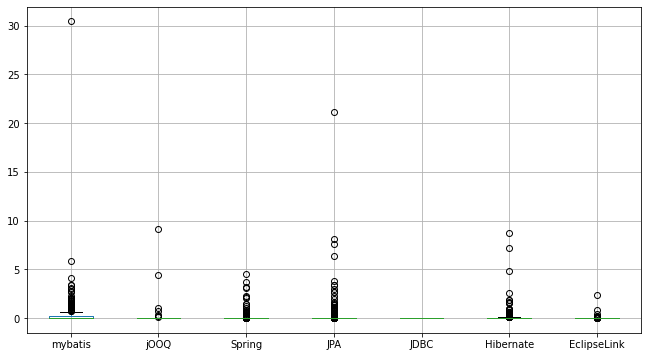

In [15]:
import matplotlib.pyplot as plt

CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[4]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
df.head()

plt.figure(figsize =(11, 6))
df.boxplot(return_type='axes');

In [16]:
CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[3]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
df.rename(columns = {'(Ignore, SQL)':'SQL'}, inplace = True)
df.head()

,Projects,Domains,Builder,"(IgnoreCase, SQL)"
0,Activiti,automation,1,1
1,skywalking,monitoring,1,1
2,storm,hpc,1,1
3,che,software development,0,1
4,pinpoint,monitoring,0,1


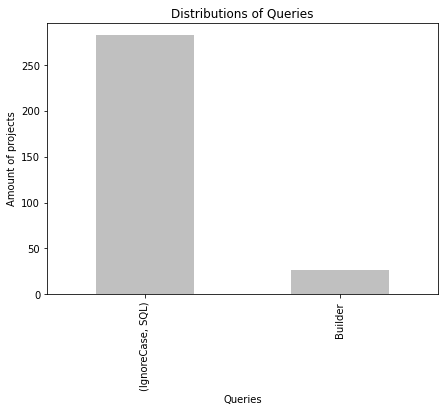

In [17]:
plt.figure(figsize=(7,5))
df.iloc[: , 2:].sum().sort_values(ascending=False).plot(kind='bar', title="Distributions of Queries", color='silver')
plt.xlabel("Queries")
plt.ylabel("Amount of projects")
plt.show()

In [18]:
df.loc[:,'SumPerProject'] = df.sum(axis=1)
df.rename(columns = {'(IgnoreCase, SQL)':'SQL'}, inplace = True)
df_count_2 = df[df.SumPerProject == 2].count()
print(df_count_2)
df_count_sql = df[df.SQL ==1].count()
print(df_count_sql)
df_count_builder = df[df.Builder == 1].count()
print(df_count_builder)
df_count_0 = df[df.SumPerProject == 0].count()
print(df_count_0)

Projects         26
Domains          26
Builder          26
SQL              26
SumPerProject    26
dtype: int64
Projects         282
Domains          282
Builder          282
SQL              282
SumPerProject    282
dtype: int64
Projects         26
Domains          26
Builder          26
SQL              26
SumPerProject    26
dtype: int64
Projects         40
Domains          40
Builder          40
SQL              40
SumPerProject    40
dtype: int64


/home/fredlinux/.pyenv/versions/3.7.9/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='type of file', ylabel='total'>

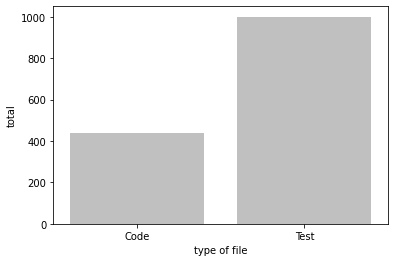

In [19]:
number_of_files = pd.read_excel('../resources/number_of_files.xlsx')

total_code_files = number_of_files['Code'].sum()
total_test_files = number_of_files['Test'].sum()

dados = {
    'type of file': ['Code', 'Test'],
    'total': [total_code_files, total_test_files]
}

dados = pd.DataFrame(dados)

sns.barplot(x = 'type of file', y = 'total', data = dados, color = 'silver')

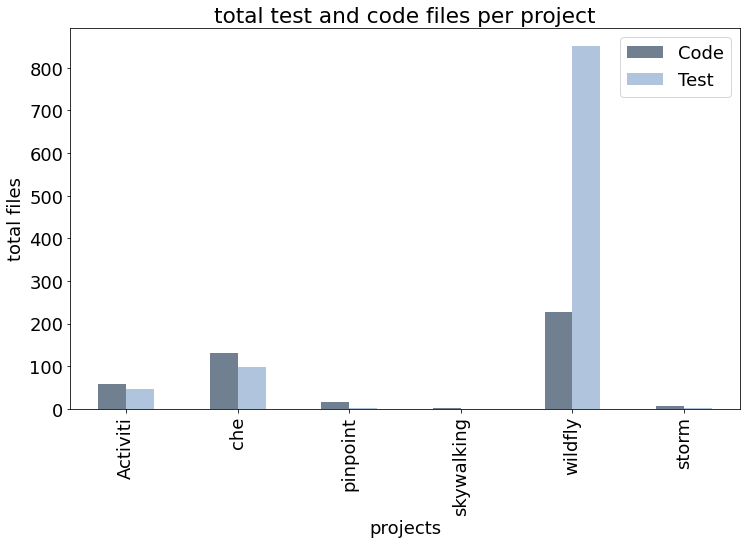

In [195]:
type_of_files  = number_of_files[['Project', 'Code', 'Test']]
type_of_files = type_of_files.set_index('Project')

type_of_files.iloc[0:].plot(kind='bar', title="total test and code files per project", color = ['slategrey', 'lightsteelblue'])
plt.xlabel("projects")
plt.ylabel("total files")
plt.rcParams.update({'font.size': 18})
plt.gcf().set_size_inches(12, 7)